In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

Note: 


Arrival Time: Customer joins the queue

Start Time: Customer starts receiving service


In [2]:
file1 = 'queue_data.csv'

data = pd.read_csv(file1)
print(data)

         arrival_time        start_time                    finish_time  \
0     30-03-2023 0.10   30-03-2023 0.10  2023-03-30 00:22:44.800000000   
1     30-03-2023 0.10   30-03-2023 0.16  2023-03-30 00:25:53.200000000   
2     30-03-2023 0.10   30-03-2023 0.16  2023-03-30 00:25:48.400000000   
3     30-03-2023 0.10   30-03-2023 0.14  2023-03-30 00:27:23.200000000   
4     30-03-2023 0.10   30-03-2023 0.15  2023-03-30 00:31:21.400000000   
..                ...               ...                            ...   
555  30-03-2023 22.00  30-03-2023 22.02  2023-03-30 22:16:59.800000000   
556  30-03-2023 22.00  30-03-2023 22.10  2023-03-30 22:13:56.200000000   
557  30-03-2023 22.00  30-03-2023 22.00  2023-03-30 22:05:35.799999999   
558  30-03-2023 23.54  30-03-2023 23.54  2023-03-31 00:00:42.400000000   
559  30-03-2023 23.54  30-03-2023 23.58  2023-03-31 00:17:23.200000000   

     wait_time  queue_length  
0        12.68            28  
1         9.82            28  
2         9.74    

In [3]:
import pandas as pd

# Assuming data is your DataFrame
# Display the column names to verify their correctness
print("Column Names:", data.columns)

# Convert the 'arrival_time' and 'start_time' columns to datetime with specified format
data['arrival_time'] = pd.to_datetime(data['arrival_time'], format='%d-%m-%Y %H.%M')
data['start_time'] = pd.to_datetime(data['start_time'], format='%d-%m-%Y %H.%M')

# Calculate the waiting time as the difference between 'start_time' and 'arrival_time'
data['waiting_time'] = (data['start_time'] - data['arrival_time']).dt.total_seconds()

# Verify the results
print(data[['arrival_time', 'start_time', 'waiting_time']].head())

Column Names: Index(['arrival_time', 'start_time', 'finish_time', 'wait_time',
       'queue_length'],
      dtype='object')
         arrival_time          start_time  waiting_time
0 2023-03-30 00:10:00 2023-03-30 00:10:00           0.0
1 2023-03-30 00:10:00 2023-03-30 00:16:00         360.0
2 2023-03-30 00:10:00 2023-03-30 00:16:00         360.0
3 2023-03-30 00:10:00 2023-03-30 00:14:00         240.0
4 2023-03-30 00:10:00 2023-03-30 00:15:00         300.0


In [4]:
df = data.copy()
# Convert 'wait_time' to numeric, coercing errors to NaN
df['waiting_time'] = pd.to_numeric(df['wait_time'], errors='coerce')

# Drop rows with NaN values in 'waiting_time'
df = df.dropna(subset=['waiting_time'])

In [5]:
# Convert 'waiting_time' to numeric, coercing errors to NaN
df['waiting_time'] = pd.to_numeric(df['waiting_time'], errors='coerce')

# Drop rows with NaN values in 'waiting_time'
df = df.dropna(subset=['waiting_time'])

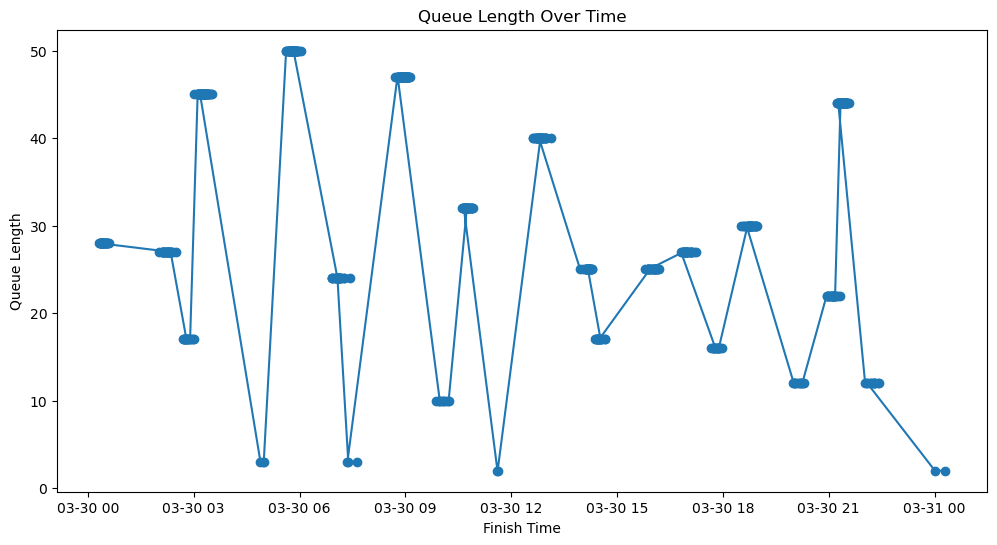

c:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


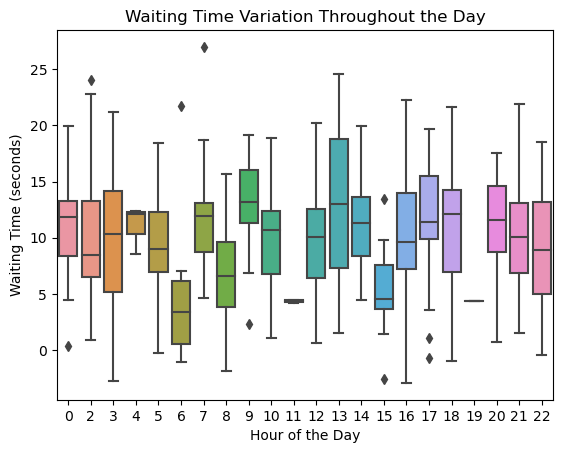

In [6]:
# Time Series Analysis:
# Plot the queue length over time to identify patterns or trends.
# Analyze the waiting time variation throughout the day.

# Convert 'finish_time' to datetime
df['finish_time'] = pd.to_datetime(df['finish_time'])

# Plot queue length over time
plt.figure(figsize=(12, 6))
plt.plot(df['finish_time'], df['queue_length'], marker='o', linestyle='-')
plt.title('Queue Length Over Time')
plt.xlabel('Finish Time')
plt.ylabel('Queue Length')
plt.show()

# Analyze waiting time variation throughout the day
df['hour'] = df['finish_time'].dt.hour
sns.boxplot(x='hour', y='waiting_time', data=df)
plt.title('Waiting Time Variation Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Waiting Time (seconds)')
plt.show()

In [7]:
# Descriptive statistics
stats = df.describe()
print(stats)

              arrival_time                     start_time  \
count                  560                            560   
mean   2023-03-30 11:14:36  2023-03-30 11:19:08.464285696   
min    2023-03-30 00:10:00            2023-03-30 00:10:00   
25%    2023-03-30 05:34:00            2023-03-30 05:37:00   
50%    2023-03-30 10:31:00            2023-03-30 10:38:00   
75%    2023-03-30 16:45:00            2023-03-30 16:54:15   
max    2023-03-30 23:54:00            2023-03-30 23:58:00   
std                    NaN                            NaN   

                         finish_time   wait_time  queue_length  waiting_time  \
count                            560  560.000000    560.000000    560.000000   
mean   2023-03-30 11:29:43.021071360   10.107911     32.132143     10.107911   
min       2023-03-30 00:19:27.400000   -2.930000      2.000000     -2.930000   
25%    2023-03-30 05:46:51.750000128    6.527500     24.750000      6.527500   
50%              2023-03-30 10:49:47   10.120000  

c:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


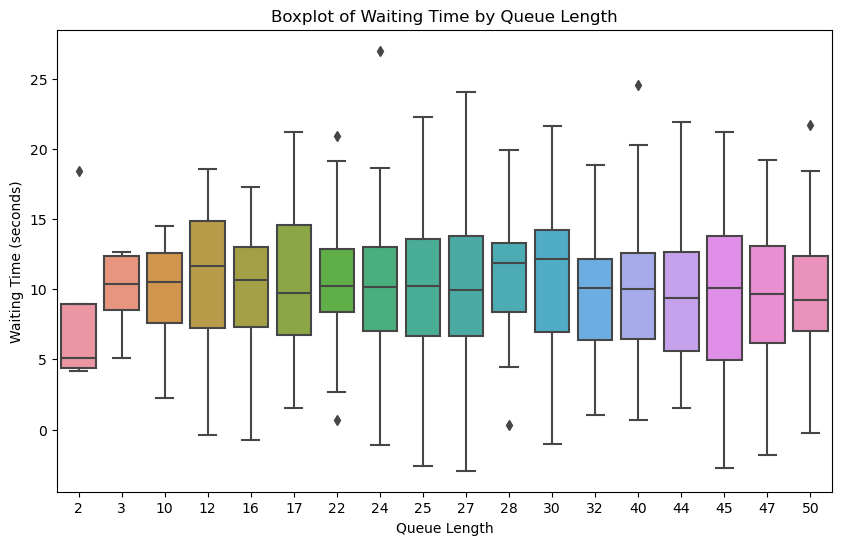

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['queue_length'], y=df['waiting_time'])
plt.title('Boxplot of Waiting Time by Queue Length')
plt.xlabel('Queue Length')
plt.ylabel('Waiting Time (seconds)')
plt.show()

arrival_time    datetime64[ns]
start_time      datetime64[ns]
finish_time     datetime64[ns]
wait_time              float64
queue_length             int64
waiting_time           float64
hour                     int32
dtype: object


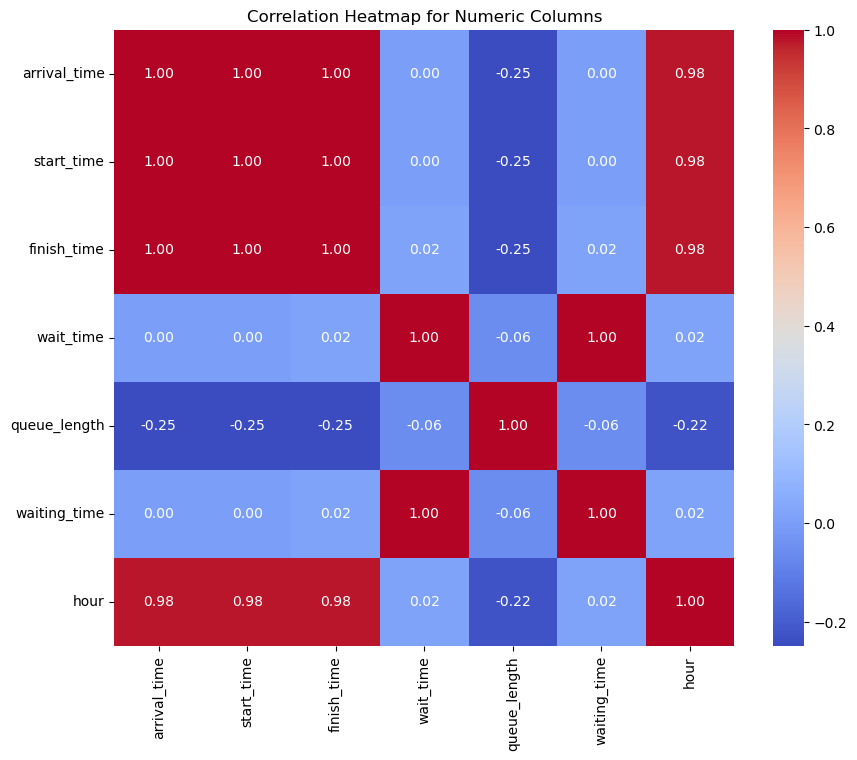

In [9]:
# Check the data types of each column
print(df.dtypes)

# Convert non-numeric columns to numeric, coercing errors to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Specify the format for 'arrival_time' and 'start_time'
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%d-%m-%Y %H.%M')
df['start_time'] = pd.to_datetime(df['start_time'], format='%d-%m-%Y %H.%M')

# Correlation matrix for numeric columns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

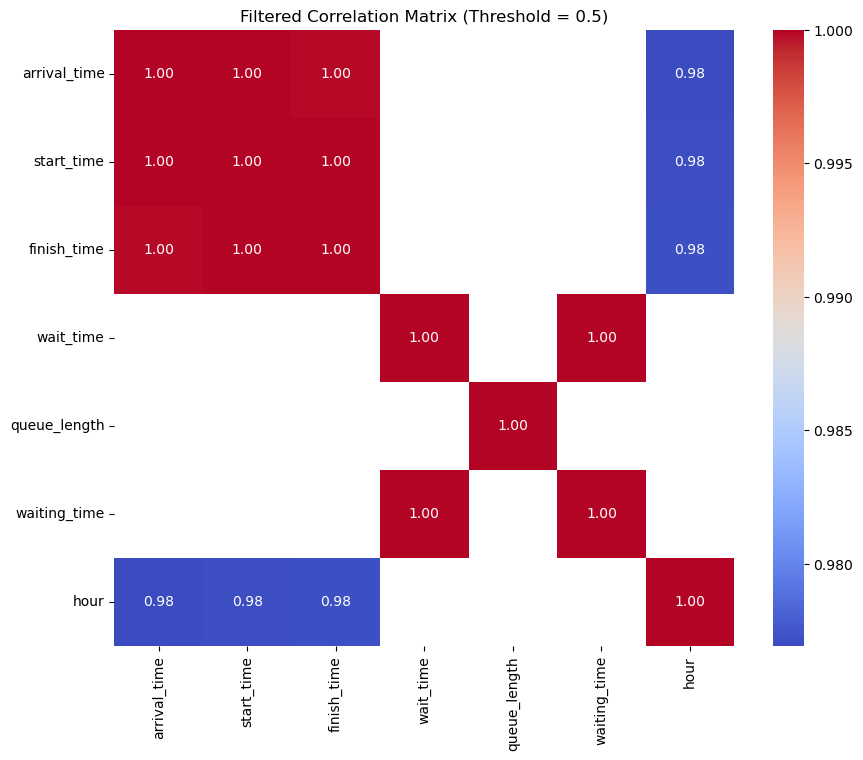

In [10]:
# Specify the correlation threshold
correlation_threshold = 0.5  # You can adjust this value based on your preference

# Filter the correlation matrix
filtered_correlation_matrix = correlation_matrix[abs(correlation_matrix) > correlation_threshold]

# Plot the filtered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Filtered Correlation Matrix (Threshold = {correlation_threshold})")
plt.show()

Highly Correlated Variable Pairs:
              arrival_time  start_time  finish_time  wait_time  queue_length  \
arrival_time         False        True         True      False         False   
start_time            True       False         True      False         False   
finish_time           True        True        False      False         False   
wait_time            False       False        False      False         False   
queue_length         False       False        False      False         False   
waiting_time         False       False        False      False         False   
hour                  True        True         True      False         False   

              waiting_time   hour  
arrival_time         False   True  
start_time           False   True  
finish_time          False   True  
wait_time            False  False  
queue_length         False  False  
waiting_time         False  False  
hour                 False  False  


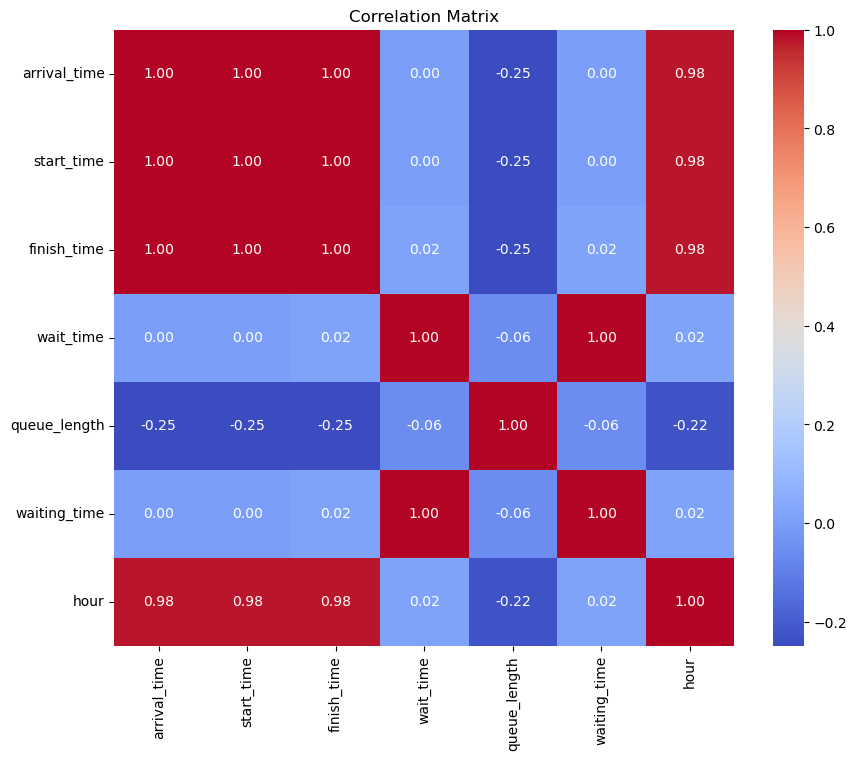

In [11]:
# Specify a high correlation threshold
high_correlation_threshold = 0.9  # You can adjust this value based on your preference

# Find highly correlated pairs
highly_correlated_pairs = (abs(correlation_matrix) > high_correlation_threshold) & (correlation_matrix < 1.0)

# Display highly correlated pairs
print("Highly Correlated Variable Pairs:")
print(highly_correlated_pairs)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [12]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
# Select relevant columns for the VAR model
columns_for_var = ['arrival_time', 'start_time', 'finish_time', 'wait_time', 'queue_length', 'waiting_time', 'hour']
df_var = df[columns_for_var]


In [14]:
# Train-test split
train_size = int(len(df_var) * 0.8)
train, test = df_var.iloc[:train_size, :], df_var.iloc[train_size:, :]
print(train.dtypes)

arrival_time    datetime64[ns]
start_time      datetime64[ns]
finish_time     datetime64[ns]
wait_time              float64
queue_length             int64
waiting_time           float64
hour                     int32
dtype: object


In [15]:
print(train.isnull().sum())


arrival_time    0
start_time      0
finish_time     0
wait_time       0
queue_length    0
waiting_time    0
hour            0
dtype: int64


In [16]:
print(train.applymap(np.isreal))

     arrival_time  start_time  finish_time  wait_time  queue_length  \
0            True        True         True       True          True   
1            True        True         True       True          True   
2            True        True         True       True          True   
3            True        True         True       True          True   
4            True        True         True       True          True   
..            ...         ...          ...        ...           ...   
443          True        True         True       True          True   
444          True        True         True       True          True   
445          True        True         True       True          True   
446          True        True         True       True          True   
447          True        True         True       True          True   

     waiting_time  hour  
0            True  True  
1            True  True  
2            True  True  
3            True  True  
4            True

C:\Users\William Lay\AppData\Local\Temp\ipykernel_30340\1549938833.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(train.applymap(np.isreal))


In [17]:
def datetime_transform(X):
    return X.values.reshape(-1, 1)  # Convert datetime to a 2D array

In [18]:
train_array = np.asarray(train.dropna())  # Remove rows with missing values

In [19]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

def datetime_transform(X):
    return X.values.reshape(-1, 1)  # Convert datetime to a 2D array

datetime_transformer = FunctionTransformer(datetime_transform, validate=False)

In [20]:
def create_dataset(dataset, look_back=1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        data_X.append(a)
        data_Y.append(dataset[i + look_back, 0])
    return np.array(data_X), np.array(data_Y)

In [25]:
#pip install keras
#pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/1f/97/dec9dfa95cfbee631adffbeb0b7eda51ddc93a5f7e8aa8f4d95dde59e69e/tensorflow-2.16.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.2 from https://files.pythonhosted.org/packages/46/87/c3e4e9fe7c630f38a6984afdd1d4ed531ef9c74dc66b86f46f6bdd89d608/tensorflow_intel-2.16.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaini

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'train' is your training set
train_features = train[['wait_time']].values.astype(float)

# Apply Min-Max scaling to the training data
scaler = MinMaxScaler(feature_range=(0, 1))
train_features_scaled = scaler.fit_transform(train_features)

# Create the training dataset with look back
look_back = 1
train_X, train_y = create_dataset(train_features_scaled, look_back)

# Reshape the input data to be in the form [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))